In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
pre_model = inception_v3.InceptionV3(include_top=False, weights="imagenet", input_shape=(299,299,3))
#pre_model.summary()

In [3]:
#Adding the layers to model
x = pre_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
pred = keras.layers.Dense(3, activation='softmax')(x)
model = keras.models.Model(inputs=pre_model.input, outputs=pred)
#model.summary()

In [4]:
#Freezing InceptionV3 layers
for layer in pre_model.layers:
    layer.trainable = False

In [5]:
train = ImageDataGenerator(rescale = 1/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation = ImageDataGenerator(rescale = 1/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [6]:
train_img = train.flow_from_directory("dataset/training", target_size = (299,299), batch_size = 5, class_mode = 'sparse')
validation_img = train.flow_from_directory("dataset/validation", target_size = (299,299), batch_size = 5, class_mode = 'sparse')

Found 30 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [7]:
x = train_img.class_indices
class_name = list(x.keys())
print(class_name)

['earbud', 'headset', 'neckband']


In [8]:
#compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#train the model
model.fit(train_img, steps_per_epoch=5, epochs=10, validation_data=validation_img)

Epoch 1/10
5/5 [==============================] - 3s 694ms/step - loss: 2.6287 - accuracy: 0.4000 - val_loss: 2.0514 - val_accuracy: 0.4000
Epoch 2/10
5/5 [==============================] - 3s 579ms/step - loss: 0.9144 - accuracy: 0.7600 - val_loss: 1.4959 - val_accuracy: 0.6667
Epoch 3/10
5/5 [==============================] - 3s 644ms/step - loss: 0.5809 - accuracy: 0.8000 - val_loss: 1.0424 - val_accuracy: 0.6667
Epoch 4/10
5/5 [==============================] - 3s 671ms/step - loss: 0.5952 - accuracy: 0.7600 - val_loss: 0.9196 - val_accuracy: 0.7333
Epoch 5/10
5/5 [==============================] - 3s 659ms/step - loss: 0.5299 - accuracy: 0.9200 - val_loss: 1.6668 - val_accuracy: 0.6667
Epoch 6/10
5/5 [==============================] - 3s 668ms/step - loss: 0.1969 - accuracy: 0.9600 - val_loss: 0.5701 - val_accuracy: 0.8000
Epoch 7/10
5/5 [==============================] - 4s 724ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 1.5864 - val_accuracy: 0.6000
Epoch 8/10
5/5 [====

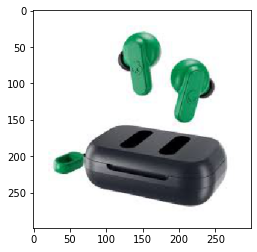

(1, 299, 299, 3)
{'earbud': 99.52, 'headset': 0.01, 'neckband': 0.47}


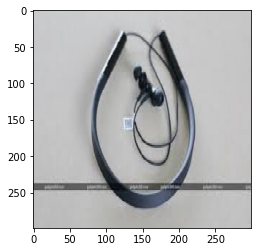

(1, 299, 299, 3)
{'earbud': 0.0, 'headset': 0.0, 'neckband': 100.0}


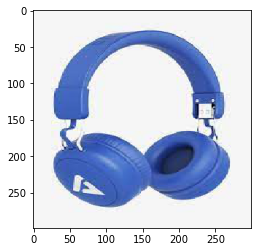

(1, 299, 299, 3)
{'earbud': 0.03, 'headset': 99.96, 'neckband': 0.01}


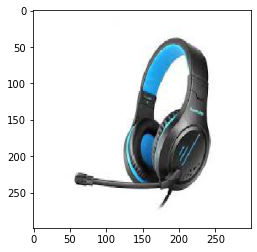

(1, 299, 299, 3)
{'earbud': 0.02, 'headset': 99.36, 'neckband': 0.62}


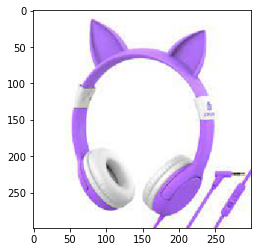

(1, 299, 299, 3)
{'earbud': 2.53, 'headset': 93.48, 'neckband': 4.0}


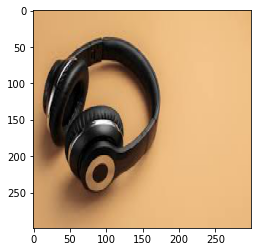

(1, 299, 299, 3)
{'earbud': 7.97, 'headset': 87.94, 'neckband': 4.09}


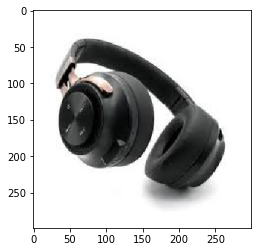

(1, 299, 299, 3)
{'earbud': 10.73, 'headset': 88.8, 'neckband': 0.47}


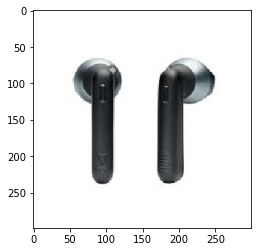

(1, 299, 299, 3)
{'earbud': 99.84, 'headset': 0.0, 'neckband': 0.15}


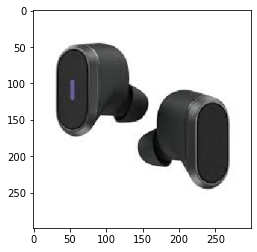

(1, 299, 299, 3)
{'earbud': 99.89, 'headset': 0.04, 'neckband': 0.08}


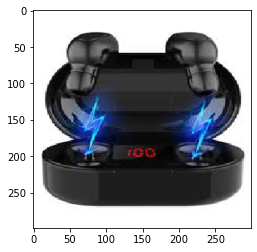

(1, 299, 299, 3)
{'earbud': 71.26, 'headset': 0.07, 'neckband': 28.68}


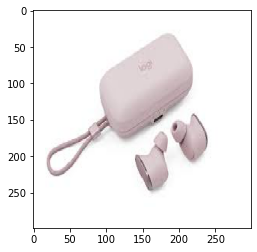

(1, 299, 299, 3)
{'earbud': 96.96, 'headset': 0.06, 'neckband': 2.98}


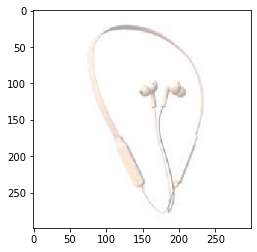

(1, 299, 299, 3)
{'earbud': 0.0, 'headset': 0.0, 'neckband': 100.0}


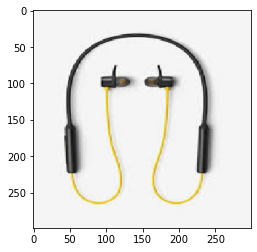

(1, 299, 299, 3)
{'earbud': 0.0, 'headset': 0.0, 'neckband': 100.0}


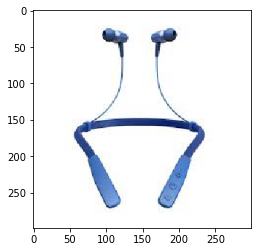

(1, 299, 299, 3)
{'earbud': 0.0, 'headset': 0.0, 'neckband': 99.99}


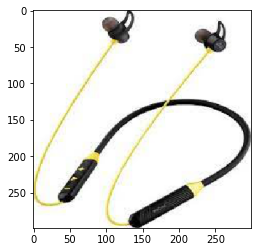

(1, 299, 299, 3)
{'earbud': 0.0, 'headset': 0.01, 'neckband': 99.99}


In [9]:
path = "dataset/testing"
for i in os.listdir(path):
    img = image.load_img(path+ '//' +i, target_size=(299,299))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    img = np.array([x])
    print(img.shape)
    img = preprocess_input(img)
    prediction = model.predict(img)[0]
    res = {class_name[i]: round(prediction[i]*100,2) for i in range(len(class_name))}
    print(str(res))